In [328]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import time
import glob

In [311]:
# Build runs dataframe
runs = [pd.read_csv(f, header=None) for f in glob.glob("./bill_dat/*.csv")]
run_intervals = [pd.to_numeric(r.loc[0], errors='coerce') for r in runs]
column_names = run_intervals[0].index + 1
run_intervals_df = pd.DataFrame(np.array(run_intervals), columns=column_names)
# Append a date column
run_dates = [datetime.datetime.strptime(r[0][2],"%m/%d/%y %H:%M") for r in runs]
run_dates_df = pd.DataFrame({'date' : run_dates})

In [370]:
# Build observations dataframe
obs = []
for r in runs:
    for idx, v in np.ndenumerate(r.loc[0].values):
        obs.append([idx[0], pd.to_numeric(v, errors='coerce'), datetime.datetime.strptime(r[0][2],"%m/%d/%y %H:%M").time()])


obs_df = pd.DataFrame(obs, columns= ['obs_index', 'interval', 'time'])

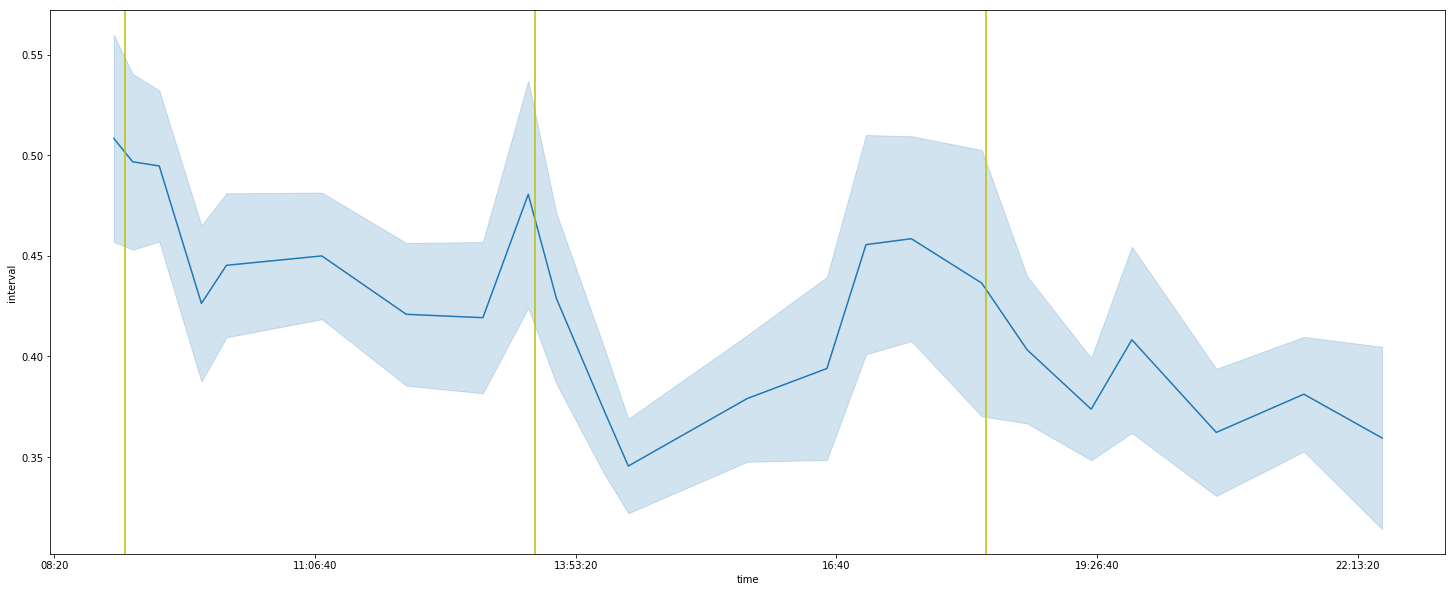

In [374]:
# Plot run means with SD bars and pill times
fig, ax = plt.subplots(figsize=(25,10))
plot = sns.lineplot(ax=ax, x='time', y='interval', data=obs_df, estimator='mean', \
             ci='sd', legend='brief', err_style='band', markers='x')
plt.axvline(x= datetime.time(9, 5), c='y')
plt.axvline(x= datetime.time(13, 27), c='y')
plt.axvline(x= datetime.time(18, 16), c='y')

plot = plot.get_figure().savefig('line_plot.png')

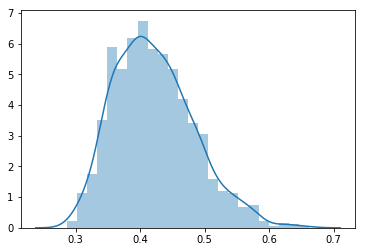

In [363]:
# Plot distribution of intervals
sns.distplot(run_intevals_df.values.flatten())

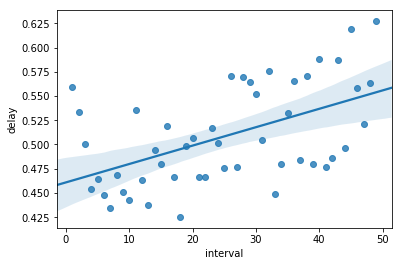

In [367]:
# Regression for a single run - tap index vs inverval
run = run_intevals_df.iloc[0]
r1 = pd.DataFrame({'interval': np.arange(1, 50), 'delay': run})
plot = sns.regplot(x= 'interval', y= 'delay', data=r1)
plot.get_figure().savefig('run_regression.png')

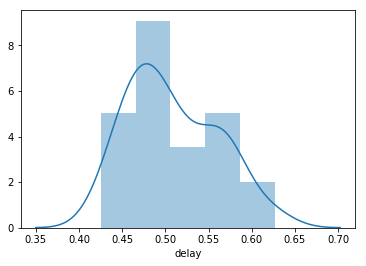

In [353]:
# Distribution for a single run - tap index vs inverval
sns.distplot(r1['delay'])